<div style="font-size: 14pt;">Prof. Krzysztof Rybinski</div><br/><br/>
<div style="font-size: 22pt;"><b>Artificial Intelligence course</b></div><br/><br/>
<div style="font-size: 18pt;">LAB 4.1</div><br/>
<div style="font-size: 18pt;">- Perceptron in Python</div><br/>
<div style="font-size: 18pt;">- Logistic regression as perceptron + sigmoid</div><br/>
<div style="font-size: 18pt;">- Gradient descent for logistic regression </div><br/>
<div style="font-size: 18pt;">- Training logistic regression as NN</div><br/>
<div style="font-size: 18pt;">- Training with batches - SGD</div><br/>


In [63]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Dataset

In [64]:
from sklearn import datasets

m, n = 200, 2

X, y = datasets.make_classification(n_samples=m, n_features=n, n_informative=2, n_redundant = 0, random_state=1234)

X = np.reshape( X, (m,n) )
y = np.reshape( y, (m,1) )

In [65]:
(X.shape, y.shape)

((200, 2), (200, 1))

X.shape = (200, 2) 
y.shape = (200, 1)

blue = class 0,   red = class 1 


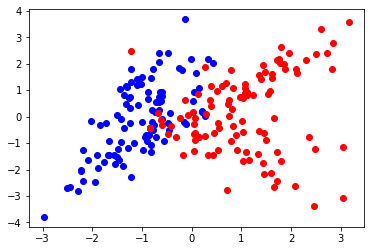

In [66]:
print('X.shape =', X.shape, '\ny.shape =', y.shape )
ind0 = np.where(y==0)
ind1 = np.where(y==1)
plt.scatter( X[ind0,0], X[ind0,1], color='b' )
plt.scatter( X[ind1,0], X[ind1,1], color='r' )
print("\nblue = class 0,   red = class 1 ")
plt.show()

# Perceptron

<img width="60%" style="float: right;" src="https://upload.wikimedia.org/wikipedia/commons/8/8c/Perceptron_moj.png">
Program perceptron and learning

In [67]:
# Exercise 1: initialize random parameters: W, b

np.random.seed(123456)

W = np.random.randn(2, 1)
b = np.random.randn(1)

print('Weights: \n', W)
print()
print('bias: ', b)

Weights: 
 [[ 0.4691123 ]
 [-0.28286334]]

bias:  [-1.5090585]


In [68]:
logits = X.dot(W) + b

In [69]:
logits.shape

(200, 1)

In [70]:
(np.where(logits >= 0, 1 , 0)).reshape([-1,20])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

# Compute logits
logits = X.dot(W) + b          #  logits = X*W + b

In [71]:
#Compute predictions
pred = np.where(logits >=0, 1, 0)

In [72]:
#Compute score
np.sum(pred == y) / m

0.52

# Logistic regression = perceptron + sigmoid

In [73]:
#Define sigmoid function
def sigmoid(z):
    return   1/(1+np.exp(-z))

In [74]:
sigmoid(0), sigmoid(0.5), sigmoid(1), sigmoid(1000000), sigmoid(-10)

(0.5, 0.6224593312018546, 0.7310585786300049, 1.0, 4.5397868702434395e-05)

In [75]:
# first 5 probabilites:
pred = sigmoid(logits)
pred[:5]

array([[0.14473575],
       [0.24425001],
       [0.17929168],
       [0.0767515 ],
       [0.1384951 ]])

In [76]:
#Define loss function
# binary cross-entropy loss, a = sigmoid(logit), y-labels
def loss( a, y ):
    return np.mean(-y*np.log(a)-(1-y)*np.log(1-a))

In [77]:
loss(pred, y)

0.7672804016348868

## Gradient

In [78]:
dz = (pred - y) / len(y)
dz.shape

(200, 1)

In [79]:
db = np.sum(dz)
db.shape

()

In [80]:
dW = X.T.dot(dz)
dW.shape

(2, 1)

In [81]:
print(dW)
print(db)

[[-0.42091488]
 [-0.13390674]]
-0.3067522246006489


## Gradient checking

### Bias

In [82]:
b_old = b
eps = 1.0e-5

b = b_old + eps
loss_plus = loss(sigmoid(X.dot(W)+b), y)

b = b_old - eps
loss_minus = loss(sigmoid(X.dot(W)+b), y)

b = b_old
print((loss_plus-loss_minus)/(2.0*eps))

-0.30675222460474494


In [83]:
db

-0.3067522246006489

### Weights

In [84]:
eps = 1.0e-5

w_old = W[0,0]
W[0,0] = w_old + eps
loss_plus = loss( sigmoid(X.dot(W)+b), y )
W[0,0] = w_old - eps
loss_minus = loss( sigmoid(X.dot(W)+b), y )
W[0,0] = w_old
print( (loss_plus-loss_minus)/(2.0*eps) )

w_old = W[1,0]
W[1,0] = w_old + eps
loss_plus = loss( sigmoid(X.dot(W)+b), y )
W[1,0] = w_old - eps
loss_minus = loss( sigmoid(X.dot(W)+b), y )
W[1,0] = w_old
print( (loss_plus-loss_minus)/(2.0*eps) )

-0.4209148832257092
-0.13390674158952898


In [85]:
dW

array([[-0.42091488],
       [-0.13390674]])

## Gradient descent

In [86]:
# learning rate
alpha = 0.1

# gradient descent
W -= alpha*dW
b -= alpha*db

In [87]:
# New loss
loss(sigmoid( X.dot(W)+b ), y)

0.7388254561115076

In [88]:
np.mean(np.where(X.dot(W) + b >= 0, 1, 0) ==y)

0.53

## Training

In [89]:
np.random.seed( 123456 )

W = np.random.randn(2, 1) 
b = np.random.randn(1)

for epoch in range(10000):
    
    logits = X.dot(W) + b
    pred = sigmoid(logits)
    dz = dz = (pred - y) / len(y)
    
    print('Epoch {} : loss = {}'.format( epoch, loss(pred,y)) )
    
    # compute gradients
    db = np.sum(dz)
    dW = X.T.dot(dz)
    
    b -= alpha * db
    W -= alpha * dW

Epoch 0 : loss = 0.7672804016348868
Epoch 1 : loss = 0.7388254561115076
Epoch 2 : loss = 0.7121934741378556
Epoch 3 : loss = 0.6873165799743696
Epoch 4 : loss = 0.6641157044844656
Epoch 5 : loss = 0.6425029495140686
Epoch 6 : loss = 0.6223843389082454
Epoch 7 : loss = 0.6036626331839681
Epoch 8 : loss = 0.586239938361604
Epoch 9 : loss = 0.5700199268326133
Epoch 10 : loss = 0.5549095810725726
Epoch 11 : loss = 0.5408204489995431
Epoch 12 : loss = 0.5276694534073119
Epoch 13 : loss = 0.515379326957461
Epoch 14 : loss = 0.5038787537209142
Epoch 15 : loss = 0.49310229485049833
Epoch 16 : loss = 0.4829901656066818
Epoch 17 : loss = 0.4734879180175538
Epoch 18 : loss = 0.46454607064569997
Epoch 19 : loss = 0.45611971566253673
Epoch 20 : loss = 0.4481681242184862
Epoch 21 : loss = 0.44065436395634294
Epoch 22 : loss = 0.433544937204747
Epoch 23 : loss = 0.42680944457825204
Epoch 24 : loss = 0.42042027606804266
Epoch 25 : loss = 0.41435232994074644
Epoch 26 : loss = 0.4085827586333361
Epoch 2

Epoch 903 : loss = 0.1983746098439458
Epoch 904 : loss = 0.1983681063846036
Epoch 905 : loss = 0.19836162360049506
Epoch 906 : loss = 0.19835516141408413
Epoch 907 : loss = 0.1983487197481832
Epoch 908 : loss = 0.19834229852595175
Epoch 909 : loss = 0.19833589767089405
Epoch 910 : loss = 0.19832951710685734
Epoch 911 : loss = 0.1983231567580303
Epoch 912 : loss = 0.19831681654894098
Epoch 913 : loss = 0.19831049640445497
Epoch 914 : loss = 0.1983041962497737
Epoch 915 : loss = 0.19829791601043253
Epoch 916 : loss = 0.19829165561229914
Epoch 917 : loss = 0.1982854149815715
Epoch 918 : loss = 0.19827919404477634
Epoch 919 : loss = 0.19827299272876744
Epoch 920 : loss = 0.1982668109607235
Epoch 921 : loss = 0.19826064866814685
Epoch 922 : loss = 0.1982545057788616
Epoch 923 : loss = 0.1982483822210118
Epoch 924 : loss = 0.19824227792305982
Epoch 925 : loss = 0.19823619281378477
Epoch 926 : loss = 0.1982301268222806
Epoch 927 : loss = 0.1982240798779548
Epoch 928 : loss = 0.198218051910526

Epoch 1402 : loss = 0.1966812540665191
Epoch 1403 : loss = 0.1966796885669244
Epoch 1404 : loss = 0.19667812715267288
Epoch 1405 : loss = 0.19667656981201279
Epoch 1406 : loss = 0.1966750165332305
Epoch 1407 : loss = 0.19667346730465024
Epoch 1408 : loss = 0.1966719221146343
Epoch 1409 : loss = 0.19667038095158249
Epoch 1410 : loss = 0.19666884380393235
Epoch 1411 : loss = 0.19666731066015877
Epoch 1412 : loss = 0.19666578150877406
Epoch 1413 : loss = 0.1966642563383275
Epoch 1414 : loss = 0.19666273513740556
Epoch 1415 : loss = 0.1966612178946314
Epoch 1416 : loss = 0.19665970459866522
Epoch 1417 : loss = 0.1966581952382037
Epoch 1418 : loss = 0.1966566898019798
Epoch 1419 : loss = 0.19665518827876313
Epoch 1420 : loss = 0.1966536906573593
Epoch 1421 : loss = 0.19665219692661015
Epoch 1422 : loss = 0.19665070707539337
Epoch 1423 : loss = 0.19664922109262242
Epoch 1424 : loss = 0.19664773896724655
Epoch 1425 : loss = 0.1966462606882505
Epoch 1426 : loss = 0.19664478624465445
Epoch 1427

Epoch 1902 : loss = 0.19623621463291777
Epoch 1903 : loss = 0.1962357606841183
Epoch 1904 : loss = 0.19623530780919077
Epoch 1905 : loss = 0.19623485600544413
Epoch 1906 : loss = 0.1962344052701946
Epoch 1907 : loss = 0.19623395560076554
Epoch 1908 : loss = 0.19623350699448777
Epoch 1909 : loss = 0.1962330594486991
Epoch 1910 : loss = 0.19623261296074468
Epoch 1911 : loss = 0.19623216752797673
Epoch 1912 : loss = 0.19623172314775478
Epoch 1913 : loss = 0.19623127981744531
Epoch 1914 : loss = 0.19623083753442203
Epoch 1915 : loss = 0.19623039629606573
Epoch 1916 : loss = 0.1962299560997642
Epoch 1917 : loss = 0.19622951694291246
Epoch 1918 : loss = 0.19622907882291224
Epoch 1919 : loss = 0.19622864173717253
Epoch 1920 : loss = 0.1962282056831093
Epoch 1921 : loss = 0.1962277706581454
Epoch 1922 : loss = 0.19622733665971065
Epoch 1923 : loss = 0.19622690368524176
Epoch 1924 : loss = 0.1962264717321824
Epoch 1925 : loss = 0.1962260407979831
Epoch 1926 : loss = 0.19622561088010126
Epoch 19

Epoch 2685 : loss = 0.1960717008837068
Epoch 2686 : loss = 0.1960716243091867
Epoch 2687 : loss = 0.1960715479032354
Epoch 2688 : loss = 0.19607147166547206
Epoch 2689 : loss = 0.19607139559551703
Epoch 2690 : loss = 0.19607131969299155
Epoch 2691 : loss = 0.19607124395751746
Epoch 2692 : loss = 0.19607116838871788
Epoch 2693 : loss = 0.1960710929862165
Epoch 2694 : loss = 0.1960710177496381
Epoch 2695 : loss = 0.19607094267860817
Epoch 2696 : loss = 0.1960708677727531
Epoch 2697 : loss = 0.19607079303170033
Epoch 2698 : loss = 0.1960707184550779
Epoch 2699 : loss = 0.19607064404251504
Epoch 2700 : loss = 0.1960705697936415
Epoch 2701 : loss = 0.19607049570808818
Epoch 2702 : loss = 0.19607042178548675
Epoch 2703 : loss = 0.19607034802546955
Epoch 2704 : loss = 0.19607027442767017
Epoch 2705 : loss = 0.19607020099172268
Epoch 2706 : loss = 0.1960701277172622
Epoch 2707 : loss = 0.1960700546039247
Epoch 2708 : loss = 0.19606998165134698
Epoch 2709 : loss = 0.1960699088591666
Epoch 2710 

Epoch 3186 : loss = 0.19604836861295752
Epoch 3187 : loss = 0.19604834289428574
Epoch 3188 : loss = 0.19604831723100663
Epoch 3189 : loss = 0.19604829162299914
Epoch 3190 : loss = 0.19604826607014247
Epoch 3191 : loss = 0.19604824057231604
Epoch 3192 : loss = 0.1960482151293995
Epoch 3193 : loss = 0.19604818974127283
Epoch 3194 : loss = 0.19604816440781633
Epoch 3195 : loss = 0.1960481391289104
Epoch 3196 : loss = 0.19604811390443583
Epoch 3197 : loss = 0.19604808873427373
Epoch 3198 : loss = 0.1960480636183053
Epoch 3199 : loss = 0.19604803855641223
Epoch 3200 : loss = 0.19604801354847617
Epoch 3201 : loss = 0.1960479885943794
Epoch 3202 : loss = 0.1960479636940042
Epoch 3203 : loss = 0.19604793884723318
Epoch 3204 : loss = 0.1960479140539492
Epoch 3205 : loss = 0.19604788931403547
Epoch 3206 : loss = 0.1960478646273754
Epoch 3207 : loss = 0.19604783999385256
Epoch 3208 : loss = 0.19604781541335092
Epoch 3209 : loss = 0.1960477908857547
Epoch 3210 : loss = 0.1960477664109483
Epoch 321

Epoch 3687 : loss = 0.19604046655268323
Epoch 3688 : loss = 0.19604045775563364
Epoch 3689 : loss = 0.19604044897729256
Epoch 3690 : loss = 0.19604044021762004
Epoch 3691 : loss = 0.19604043147657585
Epoch 3692 : loss = 0.1960404227541201
Epoch 3693 : loss = 0.19604041405021289
Epoch 3694 : loss = 0.19604040536481443
Epoch 3695 : loss = 0.19604039669788503
Epoch 3696 : loss = 0.19604038804938503
Epoch 3697 : loss = 0.19604037941927493
Epoch 3698 : loss = 0.19604037080751524
Epoch 3699 : loss = 0.19604036221406662
Epoch 3700 : loss = 0.19604035363888983
Epoch 3701 : loss = 0.1960403450819456
Epoch 3702 : loss = 0.19604033654319483
Epoch 3703 : loss = 0.19604032802259858
Epoch 3704 : loss = 0.1960403195201178
Epoch 3705 : loss = 0.19604031103571373
Epoch 3706 : loss = 0.19604030256934749
Epoch 3707 : loss = 0.19604029412098053
Epoch 3708 : loss = 0.19604028569057413
Epoch 3709 : loss = 0.19604027727808984
Epoch 3710 : loss = 0.19604026888348922
Epoch 3711 : loss = 0.19604026050673393
Epo

Epoch 4400 : loss = 0.19603723048679064
Epoch 4401 : loss = 0.1960372285431092
Epoch 4402 : loss = 0.19603722660352207
Epoch 4403 : loss = 0.19603722466802073
Epoch 4404 : loss = 0.1960372227365964
Epoch 4405 : loss = 0.19603722080924058
Epoch 4406 : loss = 0.19603721888594458
Epoch 4407 : loss = 0.19603721696669985
Epoch 4408 : loss = 0.19603721505149782
Epoch 4409 : loss = 0.19603721314032987
Epoch 4410 : loss = 0.19603721123318762
Epoch 4411 : loss = 0.1960372093300624
Epoch 4412 : loss = 0.19603720743094577
Epoch 4413 : loss = 0.19603720553582932
Epoch 4414 : loss = 0.19603720364470448
Epoch 4415 : loss = 0.19603720175756284
Epoch 4416 : loss = 0.196037199874396
Epoch 4417 : loss = 0.1960371979951956
Epoch 4418 : loss = 0.19603719611995313
Epoch 4419 : loss = 0.19603719424866028
Epoch 4420 : loss = 0.1960371923813087
Epoch 4421 : loss = 0.19603719051789006
Epoch 4422 : loss = 0.19603718865839606
Epoch 4423 : loss = 0.19603718680281837
Epoch 4424 : loss = 0.1960371849511487
Epoch 44

Epoch 4899 : loss = 0.19603662963342167
Epoch 4900 : loss = 0.19603662895344137
Epoch 4901 : loss = 0.1960366282748884
Epoch 4902 : loss = 0.19603662759775994
Epoch 4903 : loss = 0.19603662692205284
Epoch 4904 : loss = 0.1960366262477642
Epoch 4905 : loss = 0.19603662557489102
Epoch 4906 : loss = 0.1960366249034303
Epoch 4907 : loss = 0.19603662423337906
Epoch 4908 : loss = 0.19603662356473436
Epoch 4909 : loss = 0.19603662289749316
Epoch 4910 : loss = 0.19603662223165266
Epoch 4911 : loss = 0.1960366215672098
Epoch 4912 : loss = 0.19603662090416166
Epoch 4913 : loss = 0.19603662024250532
Epoch 4914 : loss = 0.1960366195822378
Epoch 4915 : loss = 0.19603661892335622
Epoch 4916 : loss = 0.19603661826585772
Epoch 4917 : loss = 0.19603661760973928
Epoch 4918 : loss = 0.19603661695499802
Epoch 4919 : loss = 0.19603661630163113
Epoch 4920 : loss = 0.19603661564963568
Epoch 4921 : loss = 0.19603661499900873
Epoch 4922 : loss = 0.1960366143497474
Epoch 4923 : loss = 0.19603661370184888
Epoch 

Epoch 5399 : loss = 0.19603641891903392
Epoch 5400 : loss = 0.19603641868097252
Epoch 5401 : loss = 0.19603641844340988
Epoch 5402 : loss = 0.19603641820634482
Epoch 5403 : loss = 0.19603641796977647
Epoch 5404 : loss = 0.1960364177337037
Epoch 5405 : loss = 0.19603641749812545
Epoch 5406 : loss = 0.19603641726304066
Epoch 5407 : loss = 0.1960364170284484
Epoch 5408 : loss = 0.19603641679434755
Epoch 5409 : loss = 0.19603641656073711
Epoch 5410 : loss = 0.196036416327616
Epoch 5411 : loss = 0.19603641609498332
Epoch 5412 : loss = 0.19603641586283793
Epoch 5413 : loss = 0.19603641563117882
Epoch 5414 : loss = 0.19603641540000502
Epoch 5415 : loss = 0.1960364151693155
Epoch 5416 : loss = 0.1960364149391092
Epoch 5417 : loss = 0.19603641470938513
Epoch 5418 : loss = 0.1960364144801423
Epoch 5419 : loss = 0.19603641425137966
Epoch 5420 : loss = 0.19603641402309627
Epoch 5421 : loss = 0.19603641379529105
Epoch 5422 : loss = 0.19603641356796297
Epoch 5423 : loss = 0.19603641334111116
Epoch 5

Epoch 6207 : loss = 0.19603632612169203
Epoch 6208 : loss = 0.19603632607788823
Epoch 6209 : loss = 0.1960363260341761
Epoch 6210 : loss = 0.1960363259905553
Epoch 6211 : loss = 0.19603632594702577
Epoch 6212 : loss = 0.19603632590358724
Epoch 6213 : loss = 0.19603632586023959
Epoch 6214 : loss = 0.19603632581698258
Epoch 6215 : loss = 0.19603632577381602
Epoch 6216 : loss = 0.1960363257307398
Epoch 6217 : loss = 0.19603632568775362
Epoch 6218 : loss = 0.1960363256448573
Epoch 6219 : loss = 0.1960363256020507
Epoch 6220 : loss = 0.19603632555933367
Epoch 6221 : loss = 0.19603632551670594
Epoch 6222 : loss = 0.1960363254741673
Epoch 6223 : loss = 0.19603632543171773
Epoch 6224 : loss = 0.19603632538935684
Epoch 6225 : loss = 0.1960363253470846
Epoch 6226 : loss = 0.19603632530490078
Epoch 6227 : loss = 0.19603632526280512
Epoch 6228 : loss = 0.19603632522079753
Epoch 6229 : loss = 0.19603632517887778
Epoch 6230 : loss = 0.19603632513704572
Epoch 6231 : loss = 0.19603632509530108
Epoch 6

Epoch 6715 : loss = 0.196036312406427
Epoch 6716 : loss = 0.19603631239129943
Epoch 6717 : loss = 0.19603631237620348
Epoch 6718 : loss = 0.19603631236113914
Epoch 6719 : loss = 0.19603631234610625
Epoch 6720 : loss = 0.19603631233110477
Epoch 6721 : loss = 0.19603631231613464
Epoch 6722 : loss = 0.1960363123011958
Epoch 6723 : loss = 0.1960363122862882
Epoch 6724 : loss = 0.1960363122714118
Epoch 6725 : loss = 0.19603631225656648
Epoch 6726 : loss = 0.19603631224175216
Epoch 6727 : loss = 0.19603631222696877
Epoch 6728 : loss = 0.19603631221221632
Epoch 6729 : loss = 0.19603631219749473
Epoch 6730 : loss = 0.1960363121828039
Epoch 6731 : loss = 0.19603631216814377
Epoch 6732 : loss = 0.1960363121535143
Epoch 6733 : loss = 0.19603631213891537
Epoch 6734 : loss = 0.196036312124347
Epoch 6735 : loss = 0.196036312109809
Epoch 6736 : loss = 0.1960363120953015
Epoch 6737 : loss = 0.19603631208082425
Epoch 6738 : loss = 0.19603631206637723
Epoch 6739 : loss = 0.19603631205196045
Epoch 6740 :

Epoch 7202 : loss = 0.19603630778126707
Epoch 7203 : loss = 0.19603630777580583
Epoch 7204 : loss = 0.19603630777035597
Epoch 7205 : loss = 0.1960363077649175
Epoch 7206 : loss = 0.19603630775949044
Epoch 7207 : loss = 0.19603630775407466
Epoch 7208 : loss = 0.1960363077486702
Epoch 7209 : loss = 0.19603630774327713
Epoch 7210 : loss = 0.1960363077378952
Epoch 7211 : loss = 0.1960363077325246
Epoch 7212 : loss = 0.1960363077271652
Epoch 7213 : loss = 0.19603630772181702
Epoch 7214 : loss = 0.19603630771648
Epoch 7215 : loss = 0.1960363077111541
Epoch 7216 : loss = 0.19603630770583938
Epoch 7217 : loss = 0.1960363077005357
Epoch 7218 : loss = 0.19603630769524316
Epoch 7219 : loss = 0.19603630768996166
Epoch 7220 : loss = 0.19603630768469116
Epoch 7221 : loss = 0.19603630767943173
Epoch 7222 : loss = 0.1960363076741833
Epoch 7223 : loss = 0.19603630766894575
Epoch 7224 : loss = 0.1960363076637192
Epoch 7225 : loss = 0.19603630765850358
Epoch 7226 : loss = 0.19603630765329888
Epoch 7227 :

Epoch 7897 : loss = 0.19603630577837344
Epoch 7898 : loss = 0.19603630577709702
Epoch 7899 : loss = 0.19603630577582323
Epoch 7900 : loss = 0.1960363057745521
Epoch 7901 : loss = 0.1960363057732836
Epoch 7902 : loss = 0.19603630577201783
Epoch 7903 : loss = 0.19603630577075465
Epoch 7904 : loss = 0.19603630576949413
Epoch 7905 : loss = 0.19603630576823622
Epoch 7906 : loss = 0.19603630576698095
Epoch 7907 : loss = 0.19603630576572828
Epoch 7908 : loss = 0.1960363057644783
Epoch 7909 : loss = 0.19603630576323083
Epoch 7910 : loss = 0.19603630576198605
Epoch 7911 : loss = 0.19603630576074388
Epoch 7912 : loss = 0.19603630575950418
Epoch 7913 : loss = 0.1960363057582672
Epoch 7914 : loss = 0.1960363057570328
Epoch 7915 : loss = 0.19603630575580092
Epoch 7916 : loss = 0.1960363057545716
Epoch 7917 : loss = 0.1960363057533449
Epoch 7918 : loss = 0.19603630575212072
Epoch 7919 : loss = 0.19603630575089917
Epoch 7920 : loss = 0.1960363057496801
Epoch 7921 : loss = 0.1960363057484636
Epoch 792

Epoch 8396 : loss = 0.1960363053825624
Epoch 8397 : loss = 0.1960363053821128
Epoch 8398 : loss = 0.19603630538166417
Epoch 8399 : loss = 0.19603630538121647
Epoch 8400 : loss = 0.19603630538076966
Epoch 8401 : loss = 0.19603630538032385
Epoch 8402 : loss = 0.19603630537987893
Epoch 8403 : loss = 0.19603630537943495
Epoch 8404 : loss = 0.19603630537899192
Epoch 8405 : loss = 0.19603630537854977
Epoch 8406 : loss = 0.19603630537810854
Epoch 8407 : loss = 0.19603630537766825
Epoch 8408 : loss = 0.19603630537722894
Epoch 8409 : loss = 0.19603630537679048
Epoch 8410 : loss = 0.19603630537635297
Epoch 8411 : loss = 0.19603630537591635
Epoch 8412 : loss = 0.19603630537548064
Epoch 8413 : loss = 0.19603630537504582
Epoch 8414 : loss = 0.19603630537461192
Epoch 8415 : loss = 0.19603630537417896
Epoch 8416 : loss = 0.1960363053737469
Epoch 8417 : loss = 0.19603630537331573
Epoch 8418 : loss = 0.19603630537288544
Epoch 8419 : loss = 0.19603630537245606
Epoch 8420 : loss = 0.19603630537202762
Epo

Epoch 8896 : loss = 0.19603630524298768
Epoch 8897 : loss = 0.19603630524282967
Epoch 8898 : loss = 0.19603630524267196
Epoch 8899 : loss = 0.19603630524251459
Epoch 8900 : loss = 0.19603630524235754
Epoch 8901 : loss = 0.19603630524220084
Epoch 8902 : loss = 0.19603630524204443
Epoch 8903 : loss = 0.19603630524188836
Epoch 8904 : loss = 0.19603630524173263
Epoch 8905 : loss = 0.19603630524157722
Epoch 8906 : loss = 0.19603630524142213
Epoch 8907 : loss = 0.19603630524126736
Epoch 8908 : loss = 0.19603630524111293
Epoch 8909 : loss = 0.1960363052409588
Epoch 8910 : loss = 0.196036305240805
Epoch 8911 : loss = 0.19603630524065158
Epoch 8912 : loss = 0.19603630524049842
Epoch 8913 : loss = 0.19603630524034557
Epoch 8914 : loss = 0.19603630524019303
Epoch 8915 : loss = 0.19603630524004084
Epoch 8916 : loss = 0.19603630523988896
Epoch 8917 : loss = 0.1960363052397374
Epoch 8918 : loss = 0.19603630523958618
Epoch 8919 : loss = 0.19603630523943522
Epoch 8920 : loss = 0.1960363052392846
Epoch

Epoch 9619 : loss = 0.19603630518401366
Epoch 9620 : loss = 0.19603630518397883
Epoch 9621 : loss = 0.19603630518394405
Epoch 9622 : loss = 0.19603630518390935
Epoch 9623 : loss = 0.1960363051838747
Epoch 9624 : loss = 0.19603630518384016
Epoch 9625 : loss = 0.19603630518380566
Epoch 9626 : loss = 0.19603630518377127
Epoch 9627 : loss = 0.1960363051837369
Epoch 9628 : loss = 0.19603630518370266
Epoch 9629 : loss = 0.1960363051836684
Epoch 9630 : loss = 0.19603630518363432
Epoch 9631 : loss = 0.19603630518360027
Epoch 9632 : loss = 0.19603630518356624
Epoch 9633 : loss = 0.19603630518353235
Epoch 9634 : loss = 0.19603630518349852
Epoch 9635 : loss = 0.19603630518346477
Epoch 9636 : loss = 0.19603630518343101
Epoch 9637 : loss = 0.19603630518339743
Epoch 9638 : loss = 0.19603630518336387
Epoch 9639 : loss = 0.19603630518333034
Epoch 9640 : loss = 0.19603630518329695
Epoch 9641 : loss = 0.19603630518326354
Epoch 9642 : loss = 0.19603630518323029
Epoch 9643 : loss = 0.1960363051831971
Epoc

In [90]:
#Compute score
np.sum(np.where(X.dot(W)+b >= 0 , 1, 0 ) == y) / m

0.915

In [91]:
np.random.seed( 123456 )

W = np.random.randn(2,1)
b = np.random.randn(1)

alpha = 0.1

batch_size = 20
for epoch in range(20):
    
    for i in range(10):
        X_batch = X[i*batch_size : (i+1)*batch_size]
        y_batch = y[i*batch_size : (i+1)*batch_size]
    
        pred = sigmoid(X_batch.dot(W) + b)
        dz = (pred-y_batch)/len(y_batch)

        print('Epoch {} : loss = {}'.format( epoch, loss(pred,y_batch)) )
    
        # compute gradients
        db = np.sum(dz)
        dW = X_batch.T.dot(dz)
    
        b -= alpha * db
        W -= alpha * dW

Epoch 0 : loss = 0.9169770780974101
Epoch 0 : loss = 0.7089471747455021
Epoch 0 : loss = 0.6756428752193206
Epoch 0 : loss = 0.579064969772125
Epoch 0 : loss = 0.47083312798294347
Epoch 0 : loss = 0.694962710157644
Epoch 0 : loss = 0.864742085487299
Epoch 0 : loss = 0.7579193576955185
Epoch 0 : loss = 0.5562670936873158
Epoch 0 : loss = 0.38547227132829065
Epoch 1 : loss = 0.7190342415811084
Epoch 1 : loss = 0.483642412956529
Epoch 1 : loss = 0.5140759447972126
Epoch 1 : loss = 0.38061886565406017
Epoch 1 : loss = 0.40795760680114046
Epoch 1 : loss = 0.5307196891142916
Epoch 1 : loss = 0.6801706703875633
Epoch 1 : loss = 0.6276272592732367
Epoch 1 : loss = 0.3771163169461206
Epoch 1 : loss = 0.3033285393159923
Epoch 2 : loss = 0.6115056258103755
Epoch 2 : loss = 0.3696433769956828
Epoch 2 : loss = 0.42518689307732493
Epoch 2 : loss = 0.2933783174283016
Epoch 2 : loss = 0.367746879800044
Epoch 2 : loss = 0.43756012817418277
Epoch 2 : loss = 0.5776274276571501
Epoch 2 : loss = 0.56557449

In [92]:
np.sum(np.where(X.dot(W)+b >= 0 , 1, 0 ) == y) / m

0.915